In [1]:
# Start with importing our training data
import pandas as pd

X_train = pd.read_csv("Data/train.csv")
y_train = X_train.pop("Survived")

In [2]:
# Let's look at the data we just imported
X_train.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3]:
# Fill in missing data
X_train["Age"].fillna(X_train.Age.mean(), inplace=True)
X_train.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
X_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 76.6+ KB


In [6]:
# Let's drop some data that we don't think we need
X_train.drop(["Name", "Ticket"], axis=1, inplace=True)

In [7]:
# We also have to fix the cabin data for the passengers that did not have cabins
# Also we can probably only focus on the first character in the cabin name
def cleanup_cabin(X):
    try:
        return X[0]
    except TypeError:
        return "None"
    
X_train["Cabin"] = X_train.Cabin.apply(cleanup_cabin)

In [8]:
X_train.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,3,male,22.0,1,0,7.2500,None,S
1,2,1,female,38.0,1,0,71.2833,C,C
2,3,3,female,26.0,0,0,7.9250,None,S
3,4,1,female,35.0,1,0,53.1000,C,S
4,5,3,male,35.0,0,0,8.0500,None,S


In [9]:
# Let's fill in all missing data
# and remove all text columns and create new numerical column for them
categorical_variables = ['Sex','Cabin','Embarked']

for variable in categorical_variables:
    X_train[variable].fillna("Missing", inplace=True)
    dummies = pd.get_dummies(X_train[variable], prefix=variable)
    X_train = pd.concat([X_train, dummies], axis=1)
    X_train.drop([variable], axis=1, inplace=True)

In [10]:
X_train.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_A,Cabin_B,...,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_None,Cabin_T,Embarked_C,Embarked_Missing,Embarked_Q,Embarked_S
0,1,3,22.0,1,0,7.2500,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
1,2,1,38.0,1,0,71.2833,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,3,3,26.0,0,0,7.9250,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,4,1,35.0,1,0,53.1000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,3,35.0,0,0,8.0500,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1


In [11]:
# Now when we have cleaned our data it's time to create our first model
from sklearn.ensemble import RandomForestRegressor

rfr_reg = RandomForestRegressor(100, oob_score=True, random_state=42)
rfr_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=True, random_state=42, verbose=0, warm_start=False)

In [12]:
# Let's check the roc_auc_score on our RandomForestRegressor
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train, rfr_reg.oob_prediction_)

0.8493885746546087

In [13]:
# Now let's see the variable importance
rfr_reg.feature_importances_

array([1.85493081e-01, 8.69351670e-02, 1.52965338e-01, 3.64274180e-02,
       1.55552189e-02, 1.54354956e-01, 1.36050758e-01, 1.58670189e-01,
       3.01656768e-03, 1.94993488e-03, 5.08948257e-03, 2.85677750e-03,
       7.00673854e-03, 4.33123601e-04, 8.25652740e-04, 2.46345643e-02,
       8.00809401e-05, 9.04799926e-03, 0.00000000e+00, 6.62595582e-03,
       1.19809971e-02])

In [14]:
# Improve readability of the feature importances 
feature_importances = pd.Series(rfr_reg.feature_importances_, index=X_train.columns)
feature_importances = feature_importances.sort_values()
feature_importances.plot(kind="barh", figsize=(7,6))

In [15]:
def graph_feature_importances(model, feature_names, autoscale=True, headroom=0.05, width=10, summarized_columns=None):
    """
    By Mike Bernico | http://bernico.net/
    """
    if autoscale:
        x_scale = model.feature_importances_.max()+headroom
    else:
        x_scale = 1
        
    feature_dict = dict(zip(feature_names, model.feature_importances_))
    
    if summarized_columns:
        # some dummy columns need to be summarized
        for col_name in summarized_columns:
            sum_value = sum(x for i, x in feature_dict.items() if col_name in i)
            
            keys_to_remove = [i for i in feature_dict.keys() if col_name in i]
            for i in keys_to_remove:
                feature_dict.pop(i)
            feature_dict[col_name] = sum_value
    
    results = pd.DataFrame.from_dict(feature_dict, orient='index').rename(columns={0:'Importance'})
    results.sort_values(by='Importance',inplace=True)
    results.plot(kind="barh", figsize=(width, len(results)/4), xlim=(0, x_scale))

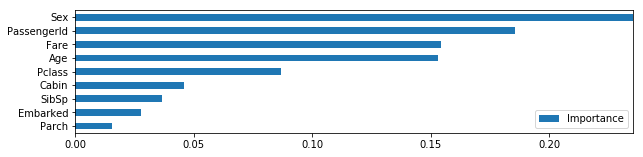

In [16]:
# Lets try to make the feature importanecs even more readable
graph_feature_importances(rfr_reg, X_train.columns, summarized_columns=categorical_variables)

In [17]:
# I find it wierd that PassengerId is so important, lets try to remove it
X_train.drop(['PassengerId'], axis=1, inplace=True)

In [18]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_None,Cabin_T,Embarked_C,Embarked_Missing,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
1,1,38.0,1,0,71.2833,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1


In [19]:
# Let's run our model again and see how we do now
rfr_reg = RandomForestRegressor(100, oob_score=True, random_state=42)
rfr_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=True, random_state=42, verbose=0, warm_start=False)

In [20]:
# This is better then the previous score of 0.8493885746546087
roc_auc_score(y_train, rfr_reg.oob_prediction_)

0.8635211282608464

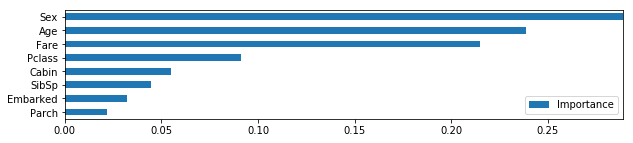

In [21]:
# Lets also look at the feature importances again
# Age and fare has much more importance now
graph_feature_importances(rfr_reg, X_train.columns, summarized_columns=categorical_variables)

In [22]:
%%timeit
# Ok time to start tweaking some parameters,
# start with test n_jobs to see what is faster
rfr_reg = RandomForestRegressor(100, oob_score=True, n_jobs=1, random_state=42)
rfr_reg.fit(X_train, y_train)

185 ms ± 719 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [23]:
%%timeit
# This is slower then n_jobs=1
rfr_reg = RandomForestRegressor(100, oob_score=True, n_jobs=-1, random_state=42)
rfr_reg.fit(X_train, y_train)

181 ms ± 3.33 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [24]:
# Lets do a grid search to experiment with some more parameters
from sklearn.model_selection import GridSearchCV

parma_grid = [
    { 'oob_score': [True], 'n_estimators': [50, 100, 250, 500], },
]

rfr_reg = RandomForestRegressor(n_jobs=1, random_state=42)
grid_search = GridSearchCV(rfr_reg, parma_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'oob_score': [True], 'n_estimators': [50, 100, 250, 500]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [25]:
# We see that the best estinators was 500, lets try a grid search again
grid_search.best_params_

{'n_estimators': 500, 'oob_score': True}

In [26]:
pd.Series()

Series([], dtype: float64)

In [27]:
parma_grid = [
    { 'oob_score': [True], 'n_estimators': [50, 100, 250, 500, 1000, 1500], },
]

rfr_reg = RandomForestRegressor(n_jobs=1, random_state=42)
grid_search = GridSearchCV(rfr_reg, parma_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'oob_score': [True], 'n_estimators': [50, 100, 250, 500, 1000, 1500]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [28]:
# Ok we have found a goold value for our estimators
grid_search.best_params_

{'n_estimators': 1000, 'oob_score': True}

In [29]:
# Let's keep going with our grid search

parma_grid = [
    { 'oob_score': [True], 'n_estimators': [50, 100, 500, 1000],
    'max_features': ['auto', 'sqrt', 'log2'], 
    'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
]

rfr_reg = RandomForestRegressor(n_jobs=1, random_state=42)
grid_search = GridSearchCV(rfr_reg, parma_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'oob_score': [True], 'n_estimators': [50, 100, 500, 1000], 'max_features': ['auto', 'sqrt', 'log2'], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [30]:
# Show the best params from our  grid search
grid_search.best_params_

{'max_features': 'auto',
 'min_samples_leaf': 5,
 'n_estimators': 100,
 'oob_score': True}

In [31]:
# Now it's finaly time to create our optimized RandomForestRegressor model
rfr_reg = RandomForestRegressor(n_estimators=1000, oob_score=True, n_jobs=-1, random_state=42, max_features="auto", min_samples_leaf=5)
rfr_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
           oob_score=True, random_state=42, verbose=0, warm_start=False)

In [32]:
# The score of 
roc_auc_score(y_train, rfr_reg.oob_prediction_)

0.8742690058479532